## Surprise Housing ##

**Problem Statement :**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Business Goal :**

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [85]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [86]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [87]:
housing_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [88]:
# Checking the percentage of Null values in all the columns
print(round(housing_df.isnull().sum()/len(housing_df.index)*100,2).sort_values(ascending=False)[round(housing_df.isnull().sum()/len(housing_df.index),2) > 0])

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [89]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [90]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Analyzing Numerical Data

**Outlier Detection**

Checking percentage of outliers for all the numerical columns.

In [91]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

Features  Percentage
30  EnclosedPorch       14.25
10     BsmtFinSF2       11.44
5     OverallCond        8.56
32    ScreenPorch        7.95
1      MSSubClass        7.05
8      MasVnrArea        6.58
2     LotFrontage        6.03
18   BsmtHalfBath        5.62
29    OpenPorchSF        5.27
3         LotArea        4.73
22   KitchenAbvGr        4.66
12    TotalBsmtSF        4.18
37      SalePrice        4.18
34        MiscVal        3.56
21   BedroomAbvGr        2.40
28     WoodDeckSF        2.19
16      GrLivArea        2.12
23   TotRmsAbvGrd        2.05
11      BsmtUnfSF        1.99
15   LowQualFinSF        1.78
31      3SsnPorch        1.64
27     GarageArea        1.44
13       1stFlrSF        1.37
9      BsmtFinSF1        0.48
33       PoolArea        0.48
6       YearBuilt        0.48
24     Fireplaces        0.34
26     GarageCars        0.34
14       2ndFlrSF        0.14
4     OverallQual        0.14
17   BsmtFullBath        0.07
35         MoSold        0.00
36         YrSold        0.00
0              Id        0.00
25    GarageYrBlt        0.00
20       HalfBath        0.00
7    YearRemodAdd        0.00
19       FullBath        0.00

**Inference:**
  - Majority of the numeric features have outliers
  - Dropping all the outliers will cause loss of information.
  - Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
  - IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
  - Target column 'SalePrice' is excluded in this

In [92]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [93]:
housing_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000   1460.000000  1460.000000   
mean    730.500000    55.085616    69.134888   9647.388014     6.100685   
std     421.610009    37.508183    19.662022   3594.356399     1.378430   
min       1.000000    20.000000    27.500000   1481.500000     2.000000   
25%     365.750000    20.000000    59.000000   7553.500000     5.000000   
50%     730.500000    50.000000    69.000000   9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000  11601.500000     7.000000   
max    1460.000000   145.000000   111.500000  17673.500000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.543493  1971.299315   1984.865753    90.192149   439.997517  ...   
std       0.963696    30.108397     20.645407   134.925253   433.219435  ...   
min       3.500000  1885.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       7.500000  2010.000000   2010.000000   415.000000  1780.625000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000         1460.0     1460.0       1460.0   
mean     91.806849    42.603425            0.0        0.0          0.0   
std     116.658120    52.501584            0.0        0.0          0.0   
min       0.000000     0.000000            0.0        0.0          0.0   
25%       0.000000     0.000000            0.0        0.0          0.0   
50%       0.000000    25.000000            0.0        0.0          0.0   
75%     168.000000    68.000000            0.0        0.0          0.0   
max     420.000000   170.000000            0.0        0.0          0.0   

       PoolArea  MiscVal       MoSold       YrSold      SalePrice  
count    1460.0   1460.0  1460.000000  1460.000000    1460.000000  
mean        0.0      0.0     6.321918  2007.815753  180921.195890  
std         0.0      0.0     2.703626     1.328095   79442.502883  
min         0.0      0.0     1.000000  2006.000000   34900.000000  
25%         0.0      0.0     5.000000  2007.000000  129975.000000  
50%         0.0      0.0     6.000000  2008.000000  163000.000000  
75%         0.0      0.0     8.000000  2009.000000  214000.000000  
max         0.0      0.0    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Correlation in Numeric Data

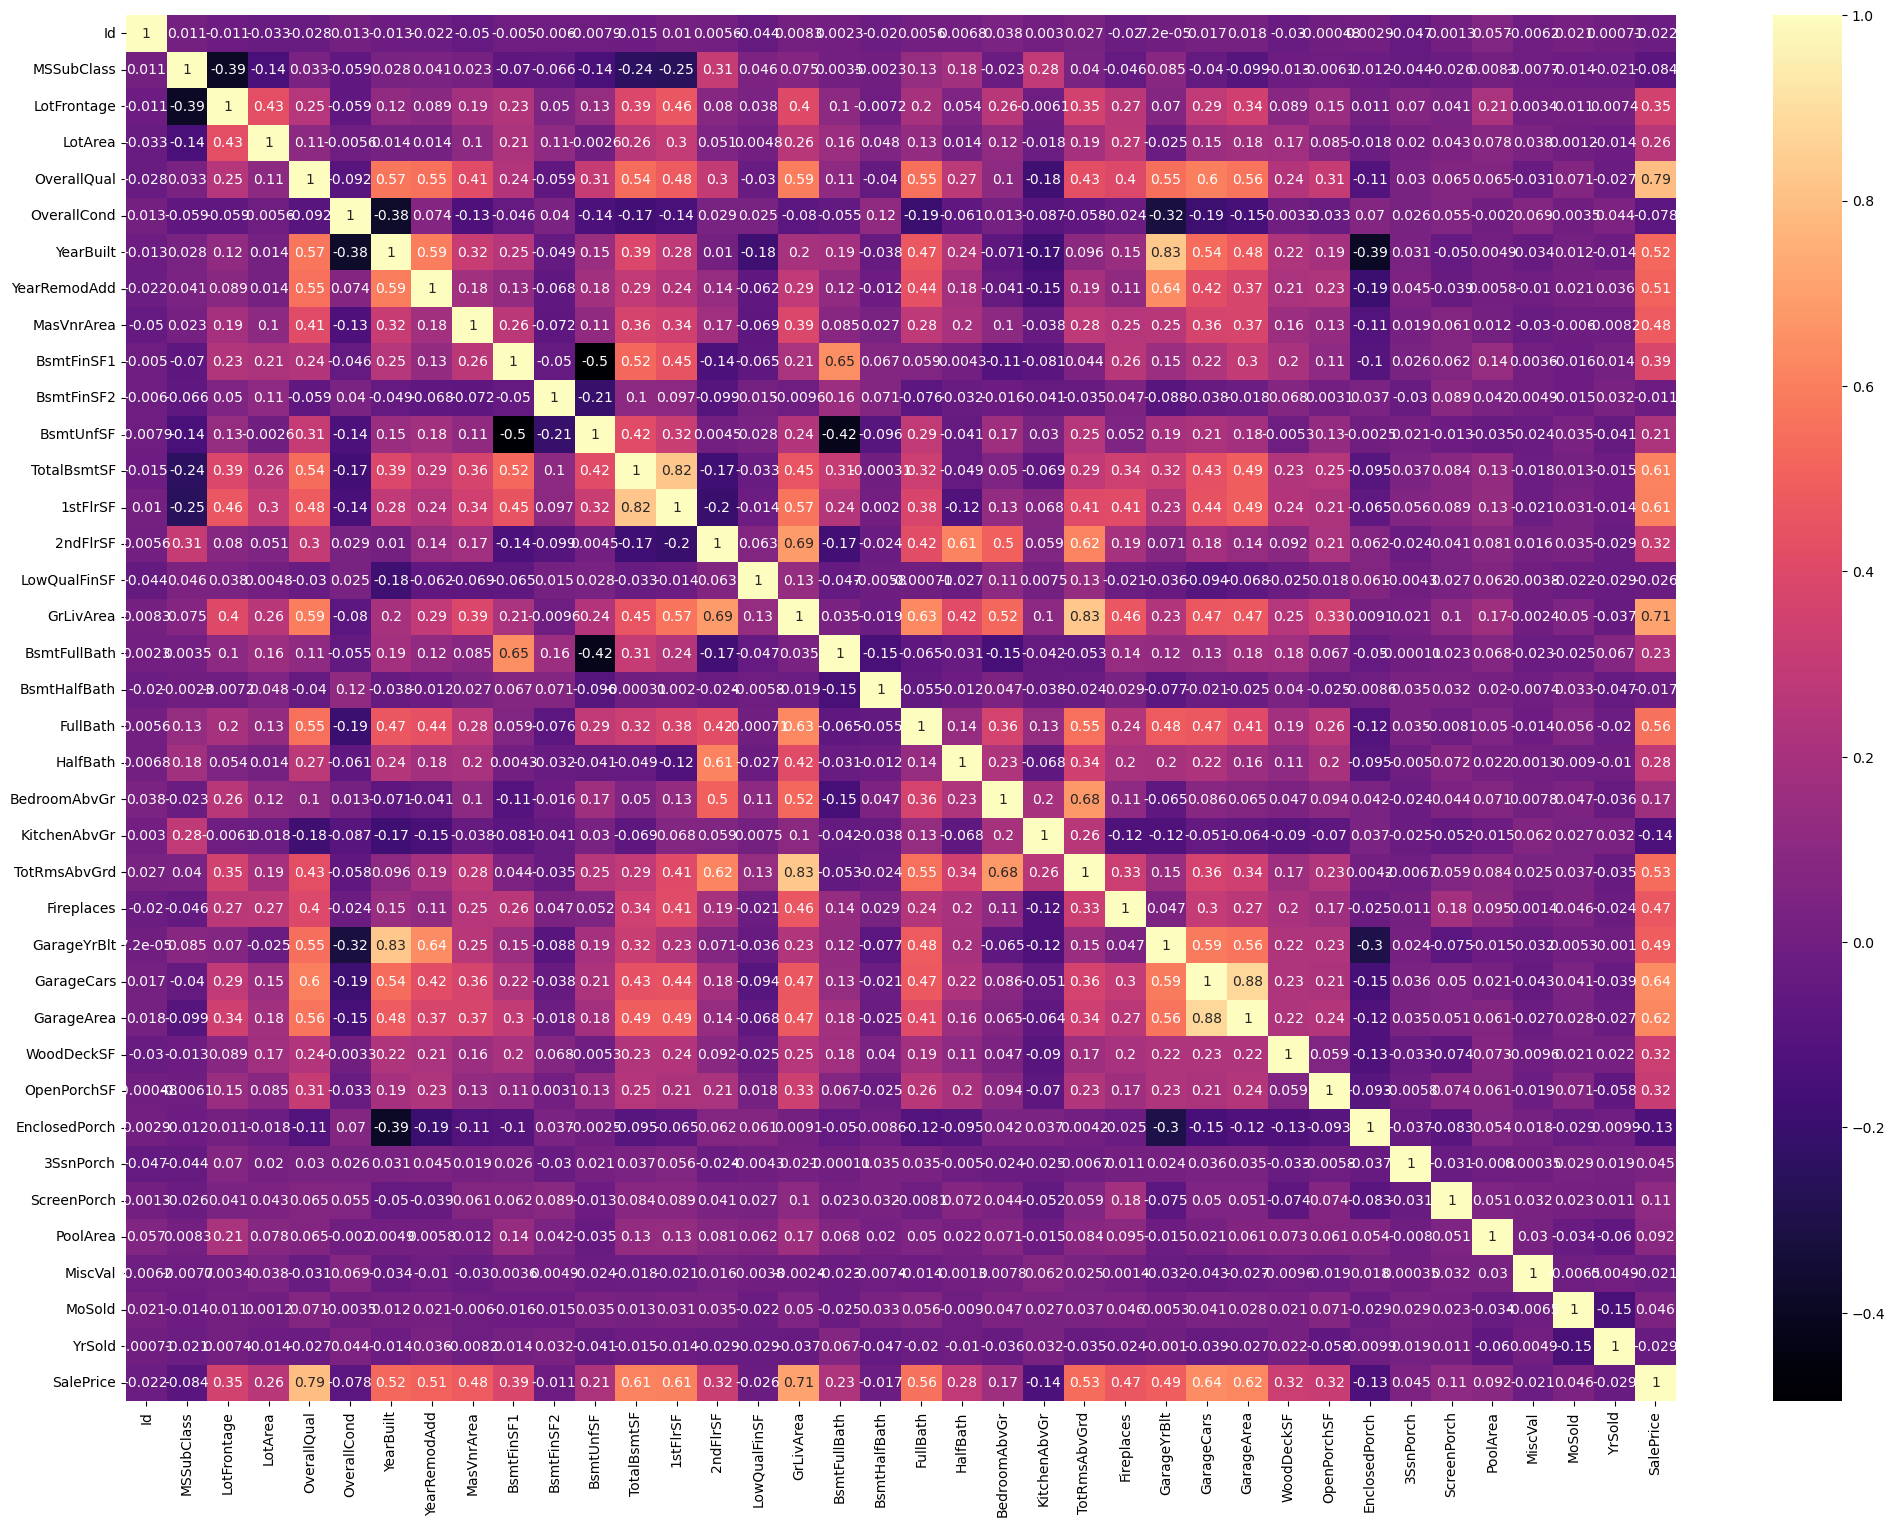

In [94]:
plt.figure(figsize=(25,18))
sns.heatmap(numeric_df.corr(), cmap='magma' ,annot=True)
plt.show()

**Inference:**
  - `GarageCars` and `GarageArea` are highly correlated (0.88)
  - `GarageYrBlt` and `YearBuilt` are highly correlated (0.83)
  - `TotRmsAbvGrd` and `GrLivArea` are highly correlated (0.83)
  - `TotalBsmtSF` and `1stflrSF` are highly correlated (0.82)
  One feature from each of these pair will be dropped after data visualization.

### Univariate and Bivariate Analysis - Numerical Features

#### Analyzing Numerical Features with continuous values

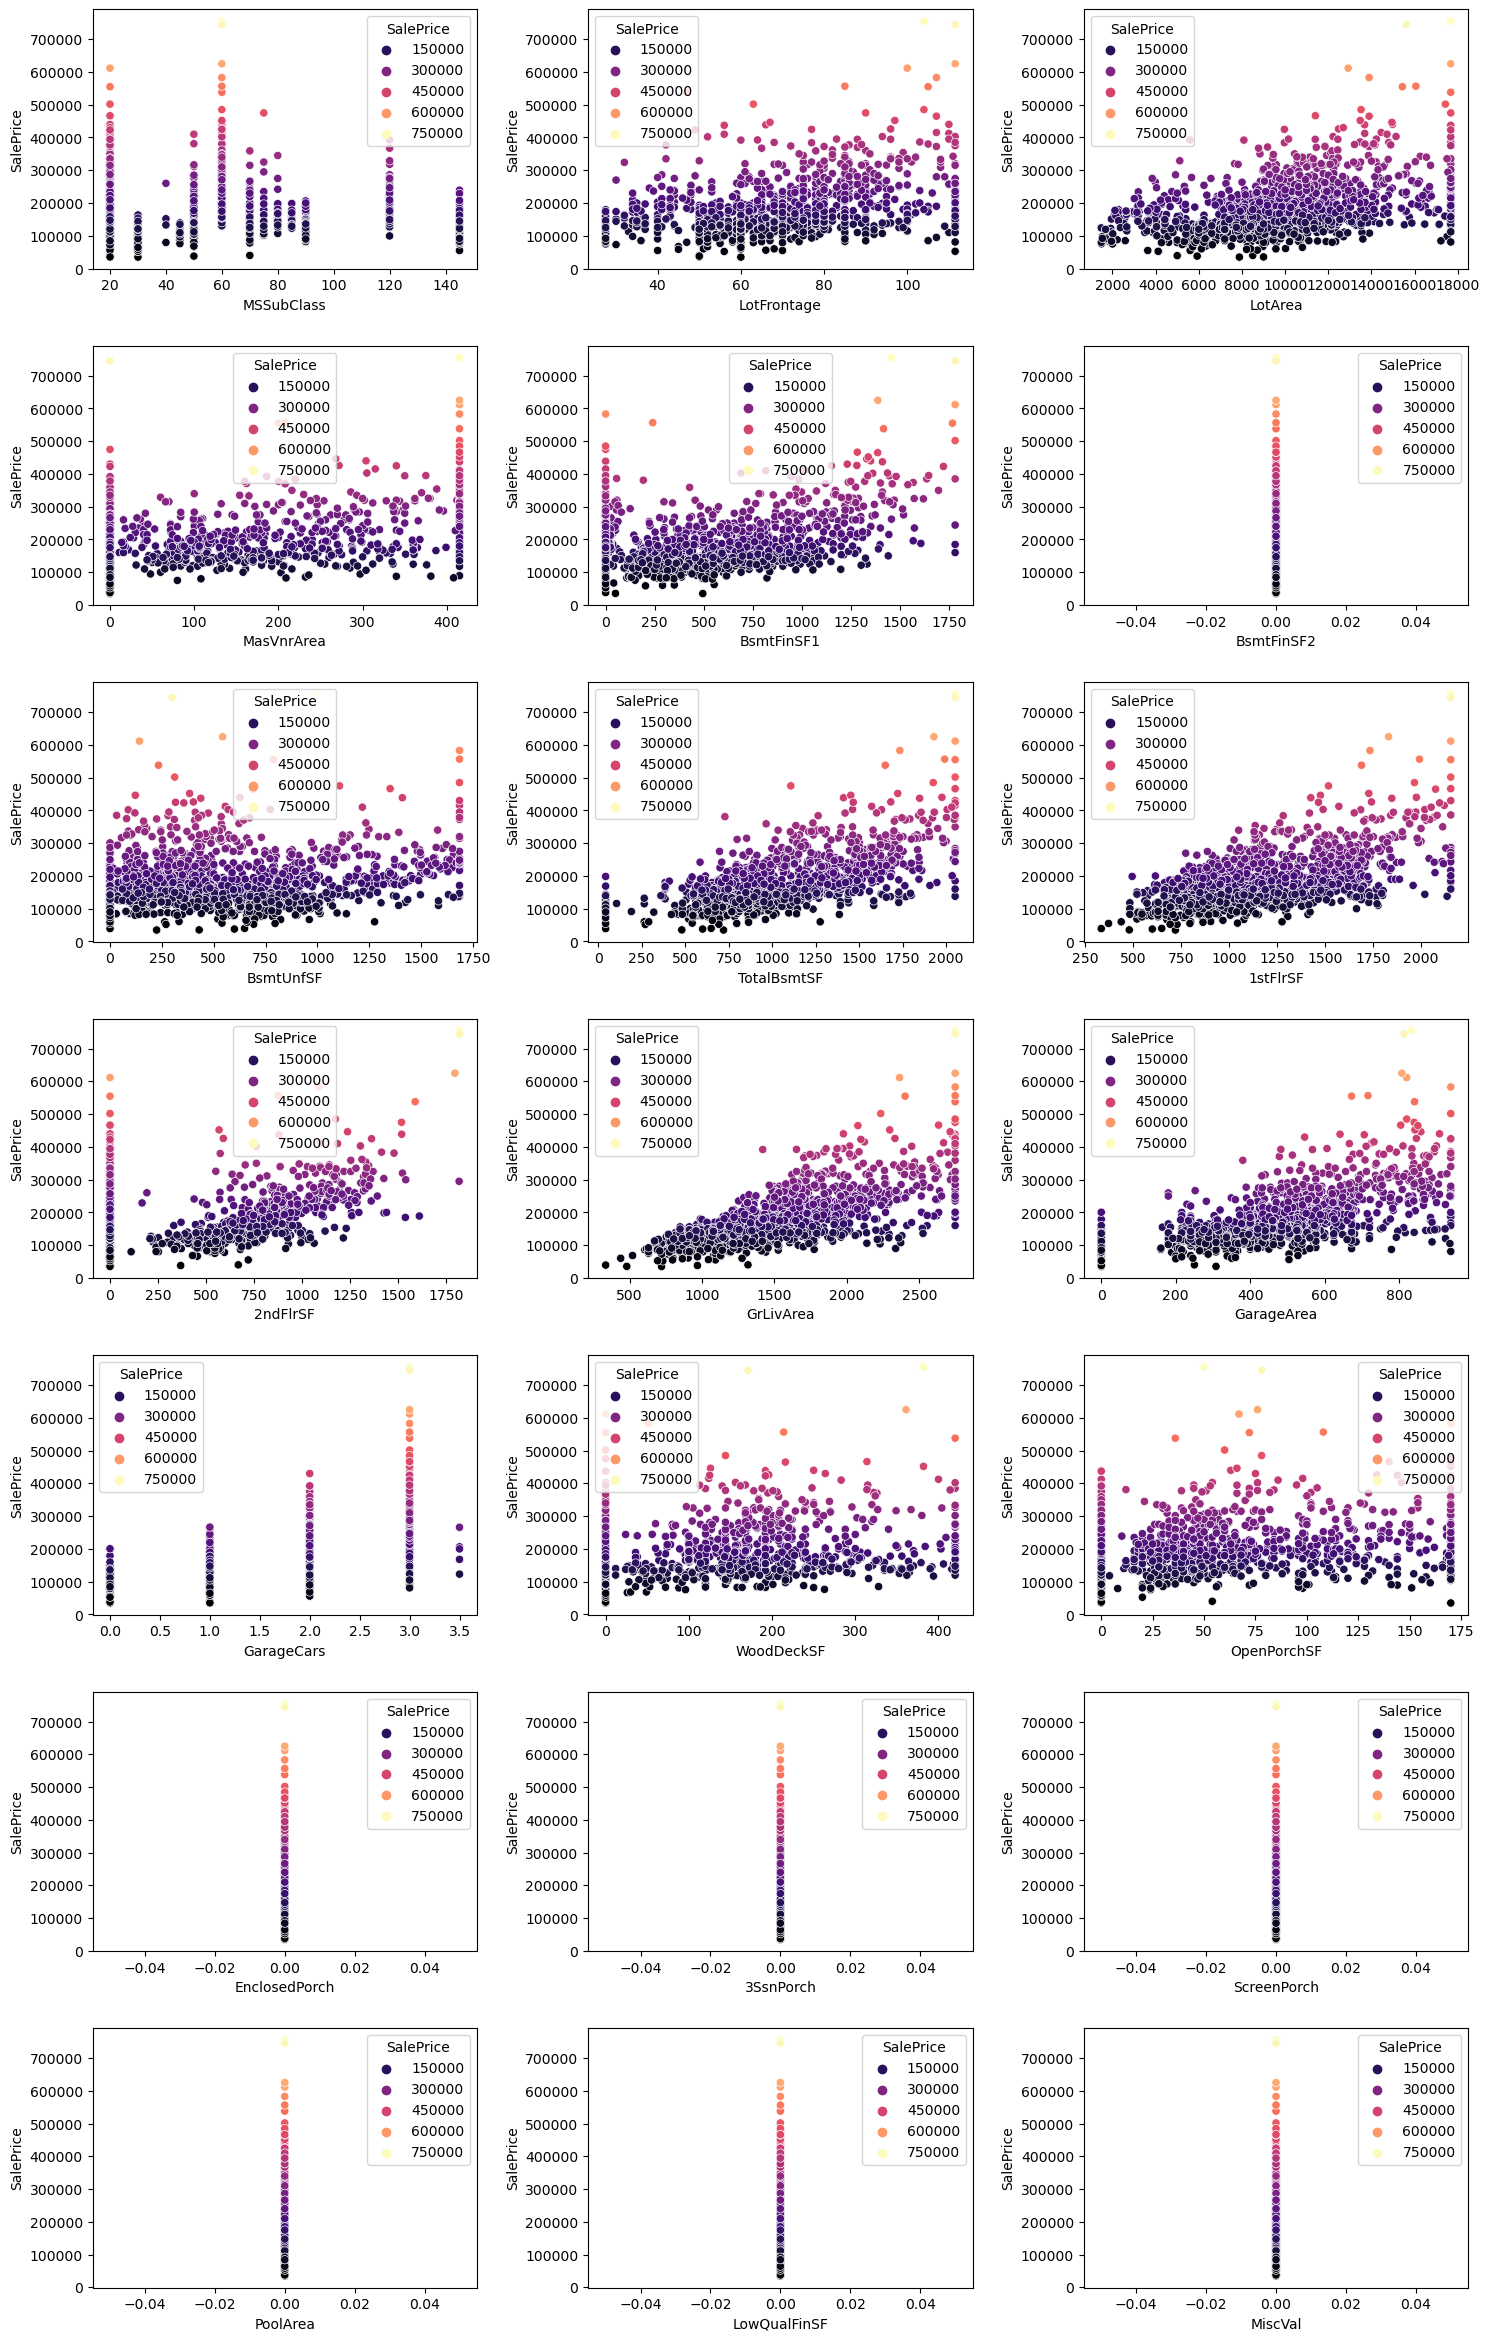

In [95]:
fig,axs=plt.subplots(figsize=(15, 30))
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LowQualFinSF','MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'], hue=housing_df['SalePrice'],data=housing_df,palette='magma')
    plt.tight_layout()

**Inference:**
  - `LotFrontage`, `LotArea`, `BsmtFinSF1`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `GarageArea` are showing positive correlation with `SalePrice`
  - `BsmtFinSF2`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `LowQualFinSF` and `MiscVal` has single value and do not show any linear pattern, hence can be dropped
  - Rest of features show no pattern and are scattered.

#### Visualizing the distribution of the numeric features

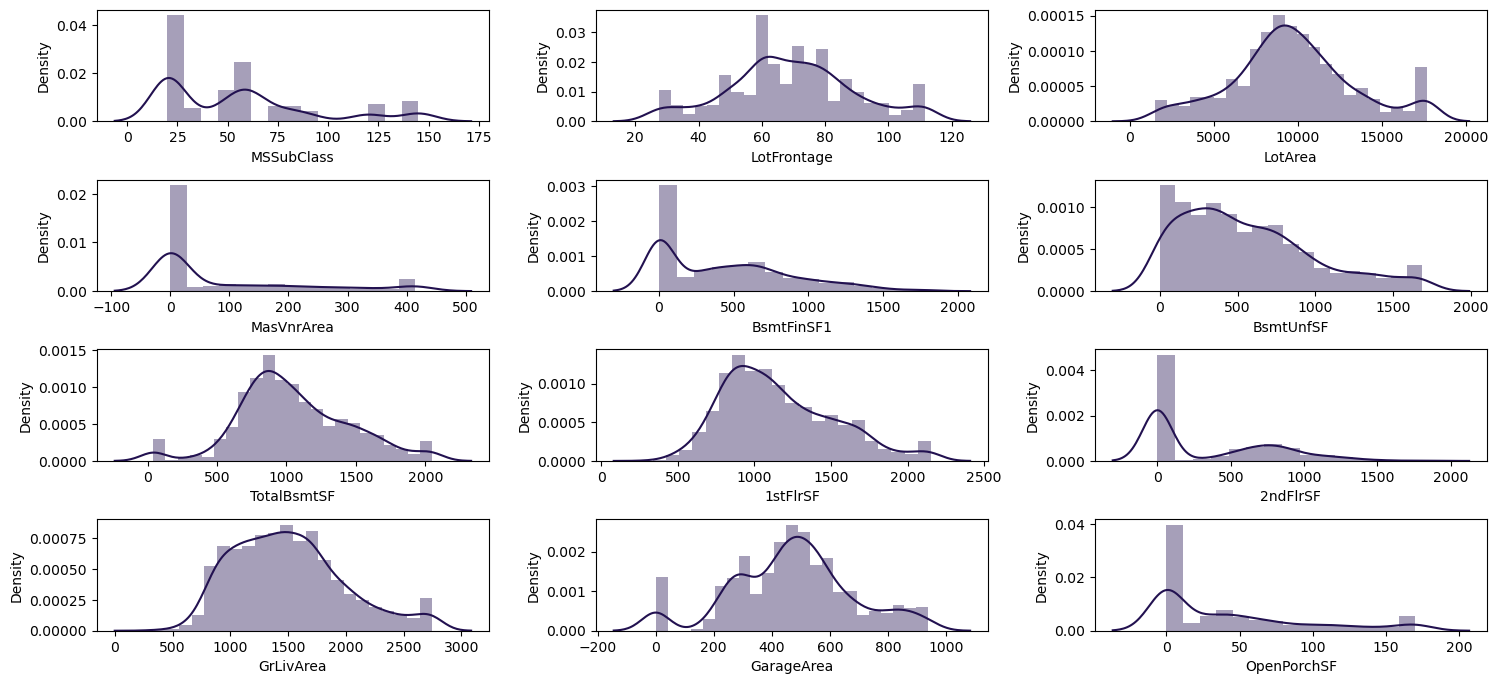

In [96]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.set_palette('magma')
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [97]:
# Removing these features having fixed values as they won't contribute in predicting SalePrice

housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal
count        1460.0         1460.0     1460.0       1460.0    1460.0   1460.0
mean            0.0            0.0        0.0          0.0       0.0      0.0
std             0.0            0.0        0.0          0.0       0.0      0.0
min             0.0            0.0        0.0          0.0       0.0      0.0
25%             0.0            0.0        0.0          0.0       0.0      0.0
50%             0.0            0.0        0.0          0.0       0.0      0.0
75%             0.0            0.0        0.0          0.0       0.0      0.0
max             0.0            0.0        0.0          0.0       0.0      0.0

Removing these features having fixed values as they won't contribute in predicting SalePrice

In [98]:
#since the count of occurrences for the following column percentage of total

housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].value_counts(normalize=True)

LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal
0             0              0          0            0         0          1.0
dtype: float64

In [99]:
housing_df.drop(['BsmtFinSF2','LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF'

#### Analyzing Numerical Features with Independent Discrete Values

In [100]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']].head()


OverallQual  OverallCond  MoSold  YrSold  BsmtFullBath  BsmtHalfBath  \
0            7          5.0       2    2008           1.0             0   
1            6          7.5       5    2007           0.0             0   
2            7          5.0       9    2008           1.0             0   
3            7          5.0       2    2006           1.0             0   
4            8          5.0      12    2008           1.0             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1           3.0             1             8         0.0   
1         2         0           3.0             1             6         1.0   
2         2         1           3.0             1             6         1.0   
3         1         0           3.0             1             7         1.0   
4         2         1           4.0             1             9         1.0   

   GarageYrBlt  YearBuilt  YearRemodAdd  
0       2003.0       2003          2003  
1       1976.0       1976          1976  
2       2001.0       2001          2002  
3       1998.0       1915          1970  
4       2000.0       2000          2000

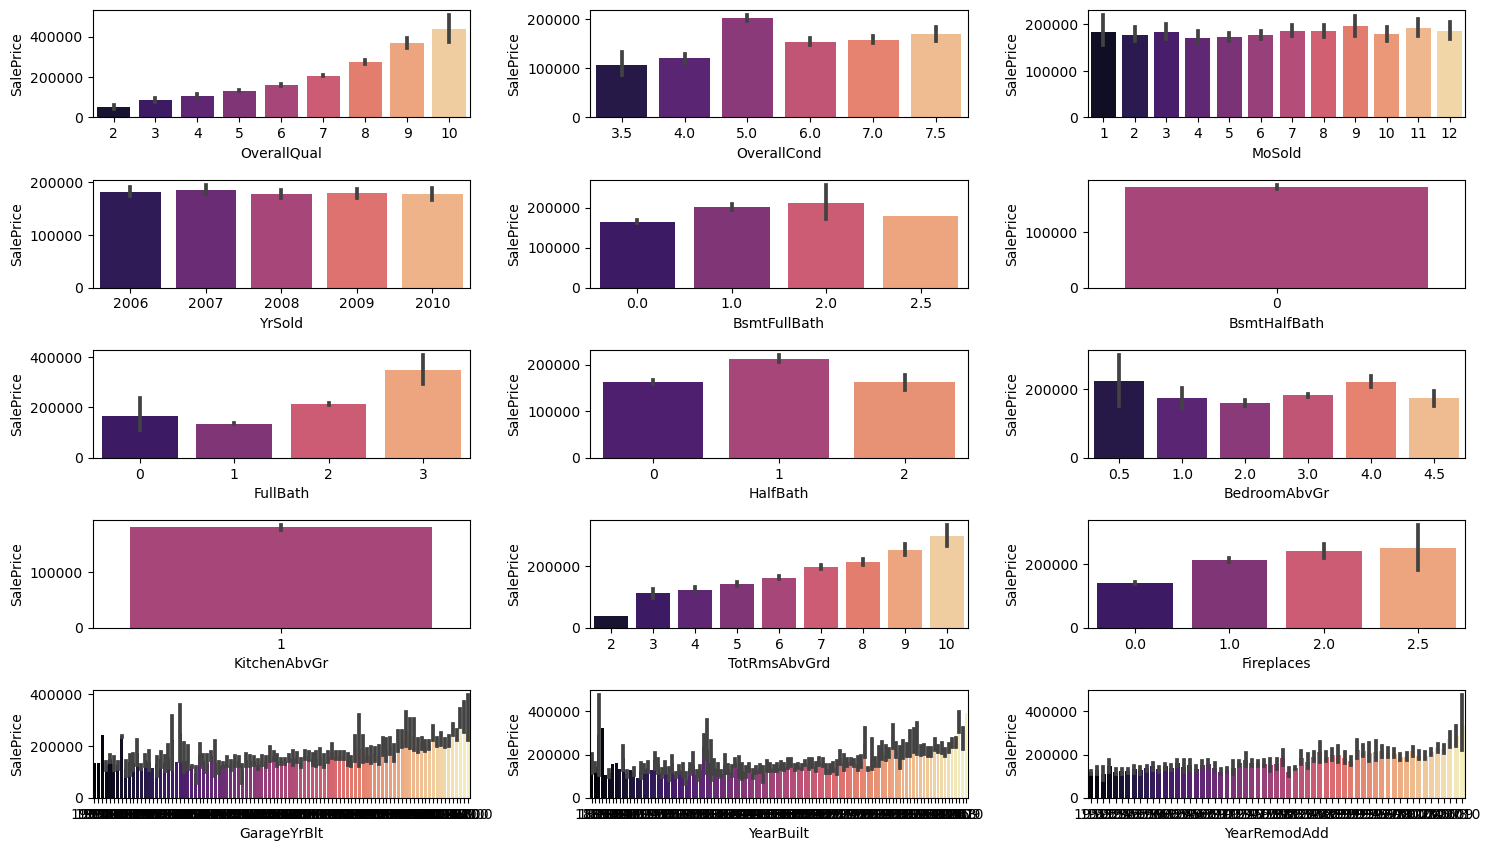

In [101]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'], palette='magma')
    plt.tight_layout()

**Inference:**

 - `OverallQual` : As the rating of this feature increases, the SalePrice (target variable) increases

 - `OverallCond` : SalePrice is highest for rating 5

 - `MoSold` and `YrSold`: SalePrice does not show a strong trend depending on month and year on which realty is sold
 - `BsmtFullBath` = 2 and `BsmtHalfBath` = 0 have highest SalePrice

 - `FullBath` = 2 and `HalfBath` = 1 have highest SalePrice

 - `TotRmsAbvGrd` : As the number of total rooms above grade increase the SalePrice also increases

 - `GarageYrBlt`,`YearBuilt`,`YearRemodAdd`, `YrSold` : Will extract new features from to identify any trend

 - `BsmtFullBath`, `KitchenAbvGr` : Need further inspection for meaningful insight

In [102]:
print(housing_df[['KitchenAbvGr','BsmtHalfBath']].value_counts(normalize=True))

KitchenAbvGr  BsmtHalfBath
1             0               1.0
dtype: float64


In [103]:
# dropping KitchenAbvGr, BsmtHalfBath for not having useful information
housing_df.drop(['KitchenAbvGr','BsmtHalfBath'], axis=1, inplace=True)

In [104]:
# Derived Age column the year related features into number of years

housing_df['Age'] = housing_df['YrSold'] - housing_df['YearBuilt']

In [105]:
# Converting the year related features into number of years based on year it was sold
import datetime

current_year = datetime.datetime.now().year
for feature in ['GarageYrBlt','YearRemodAdd']:
    housing_df[feature] = housing_df['YrSold'] - housing_df[feature]

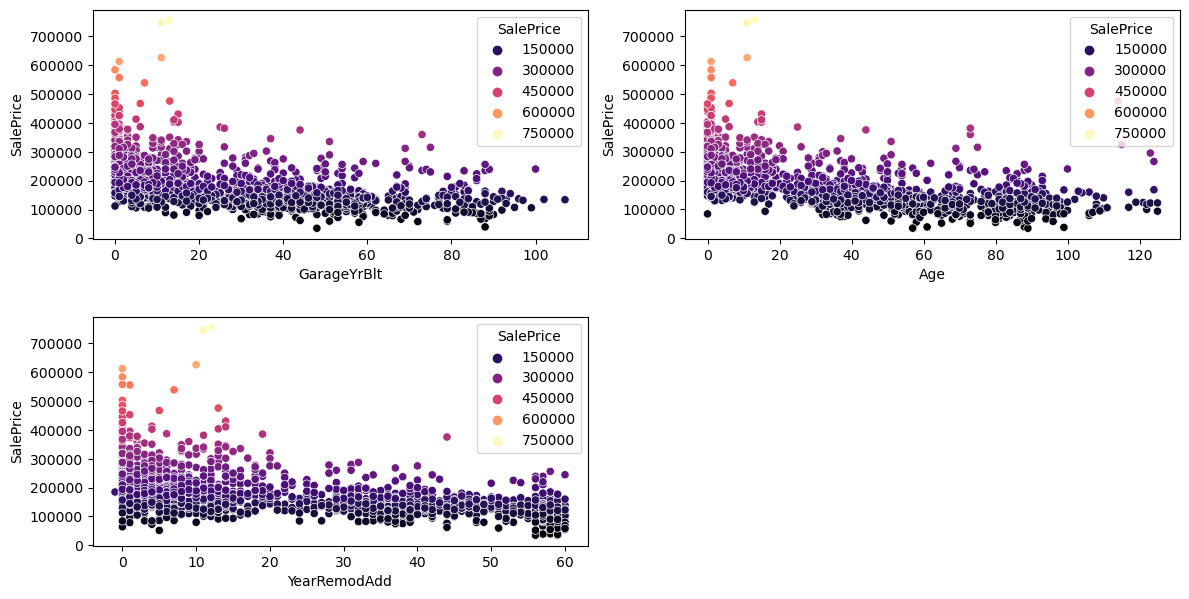

In [106]:

fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','Age','YearRemodAdd']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'], hue=housing_df['SalePrice'],data=housing_df,palette='magma')
    plt.tight_layout()

**Inference:**

 - `GarageYrBlt` built within last 20 years has higher SalePrice than once older ones
 - `SalePrice` is higher for the recently built houses e.i within last 20 years than the ones that that are older.
 - Recently remodelled houses (lower value of `YearRemodAdd`) have higher SalePrice

#### Missing Value Handling - Numerical Features

In [107]:
missing_percentage = {}
for feature in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feature].isnull().any():
        missing_percentage[feature] = round(housing_df[feature].isnull().sum()/housing_df.shape[0], 2)*100
    
pd.DataFrame({'Features':list(missing_percentage.keys()),'Percentage of Missing Value':list(missing_percentage.values())})

Features  Percentage of Missing Value
0  LotFrontage                         18.0
1   MasVnrArea                          1.0
2  GarageYrBlt                          6.0

In [108]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]

# Dropping Id column as it does not contribute towards predicting SalePrice
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [109]:
# Checking the number of remaining columns
housing_df.columns.shape

(72,)

 **Inference:**
 
 - GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
 - GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
 - TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
 - TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
 - Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage.

In [110]:
housing_df[['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF']].isnull().sum()

GarageCars      0
GarageYrBlt    81
GrLivArea       0
TotalBsmtSF     0
dtype: int64

In [111]:
housing_df.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

# Checking the number of remaining columns
print(housing_df.columns.shape)

(68,)


### Analyzing Categorical Features

In [112]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

### Missing Value Handling - Categorical Features

In [113]:
missing_percentage = {}
for feature in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feature].isnull().any():
        missing_percentage[feature] = round(housing_df[feature].isnull().sum()/housing_df.shape[0], 2)*100
    
pd.DataFrame({'Features':list(missing_percentage.keys()),'Percentage of Missing Value':list(missing_percentage.values())})

Features  Percentage of Missing Value
0          Alley                         94.0
1       BsmtQual                          3.0
2       BsmtCond                          3.0
3   BsmtExposure                          3.0
4   BsmtFinType1                          3.0
5   BsmtFinType2                          3.0
6     Electrical                          0.0
7    FireplaceQu                         47.0
8     GarageType                          6.0
9   GarageFinish                          6.0
10    GarageQual                          6.0
11    GarageCond                          6.0
12        PoolQC                        100.0
13         Fence                         81.0
14   MiscFeature                         96.0

In [114]:
housing_df['Electrical'].isnull().sum()

1

**Inference:**

 - For 'Alley', NA means 'No alley access'
 - For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 NA means 'No basement'
 - For GarageType, GarageFinish, GarageQual, GarageCond NA means 'No Garage'
 - For 'FireplaceQu' and 'Fence' NA means 'No Fireplace' and 'No fence' respectively
 - MiscFeature - NA means no additional features mentioned.
 - PoolQC - NA means No Pool

All these features will be imputed with meaningful values in place of missing data.

In [115]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [116]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [117]:
# dropping 'PoolQC' for very high percentage of NA
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [118]:
missing_percentage = {}
for feature in housing_df.columns:
    if housing_df[feature].isnull().any():
        missing_percentage[feature] = round(housing_df[feature].isnull().sum()/housing_df.shape[0], 2)*100
    
pd.DataFrame({'Features':list(missing_percentage.keys()),'Percentage of Missing Value':list(missing_percentage.values())})

Features  Percentage of Missing Value
0  LotFrontage                         18.0

In [119]:
# #Impute LotFrontage missing values with median
# housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median(), inplace=True)

In [120]:
housing_df.columns.shape

(67,)

**Encoding For Categorical Variables Ordered Features -- to be label encoded** 'LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'CentralAir'

**Unordered Features -- to be one hot encoded** 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition'

In [121]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(15, 45))
    for i, feature in enumerate(feature_list):
        plt.subplot(10, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(data=housing_df, y="SalePrice", x=feature, palette='magma')
        plt.tight_layout()

### Analyzing Ordered Features

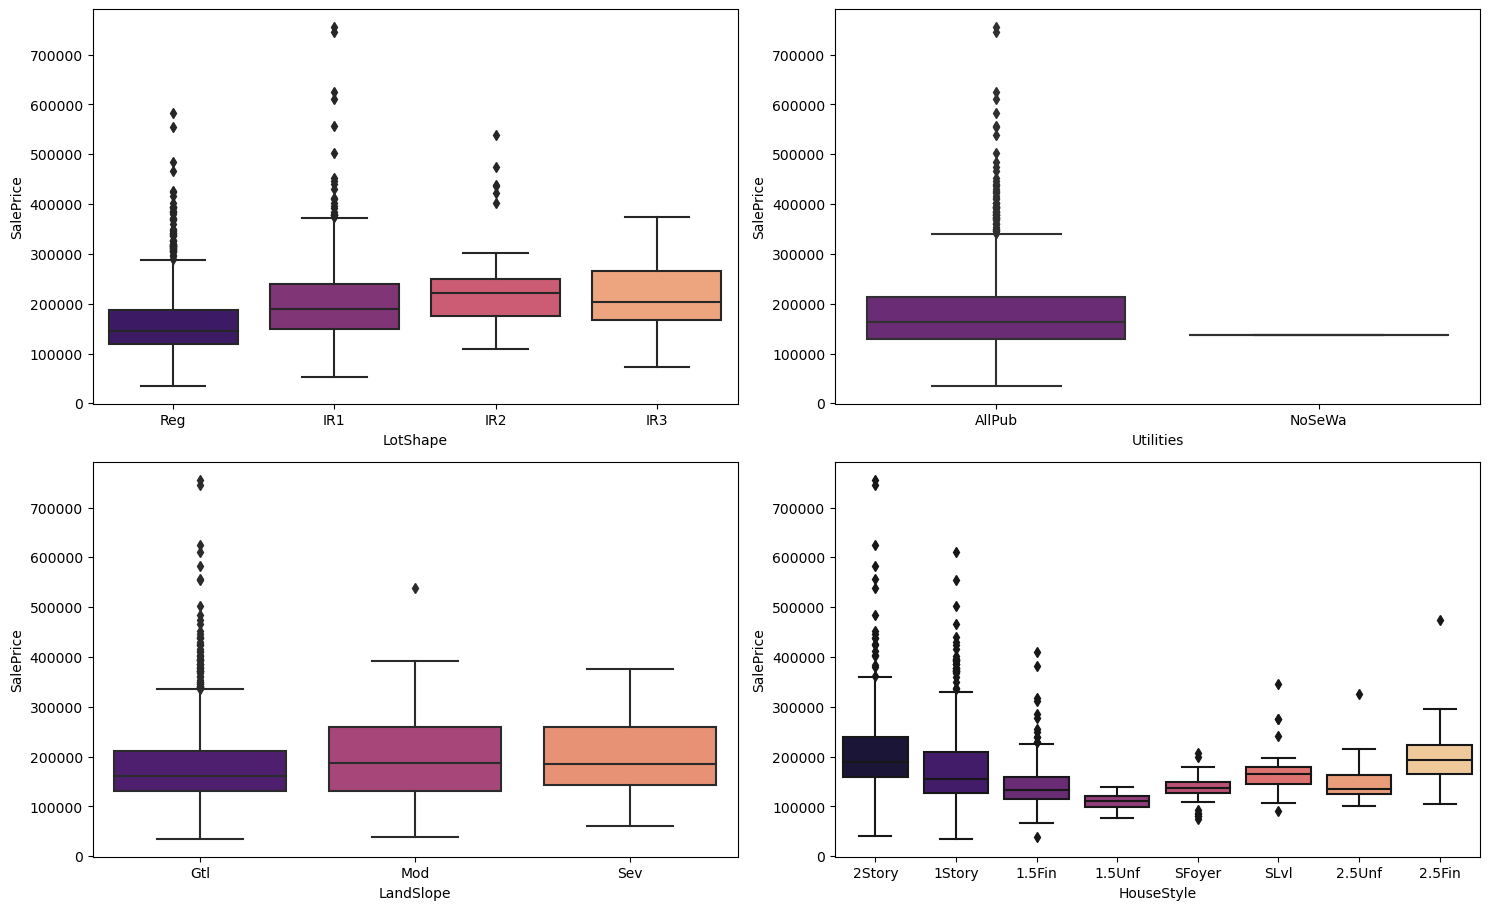

In [122]:
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle']

generate_boxplot(ext_features)

**Inference**

 - 'LotShape' : Slightly irregular LotShape have the highest SalePrice
 - 'Utilities' : Most of the houses in the dataset have all the public utilities
 - 'LandSlope' : Houses at severe land slope have lowest SalePrice
 - 'HouseStyle' : 2 storied houses have the highest SalePrice

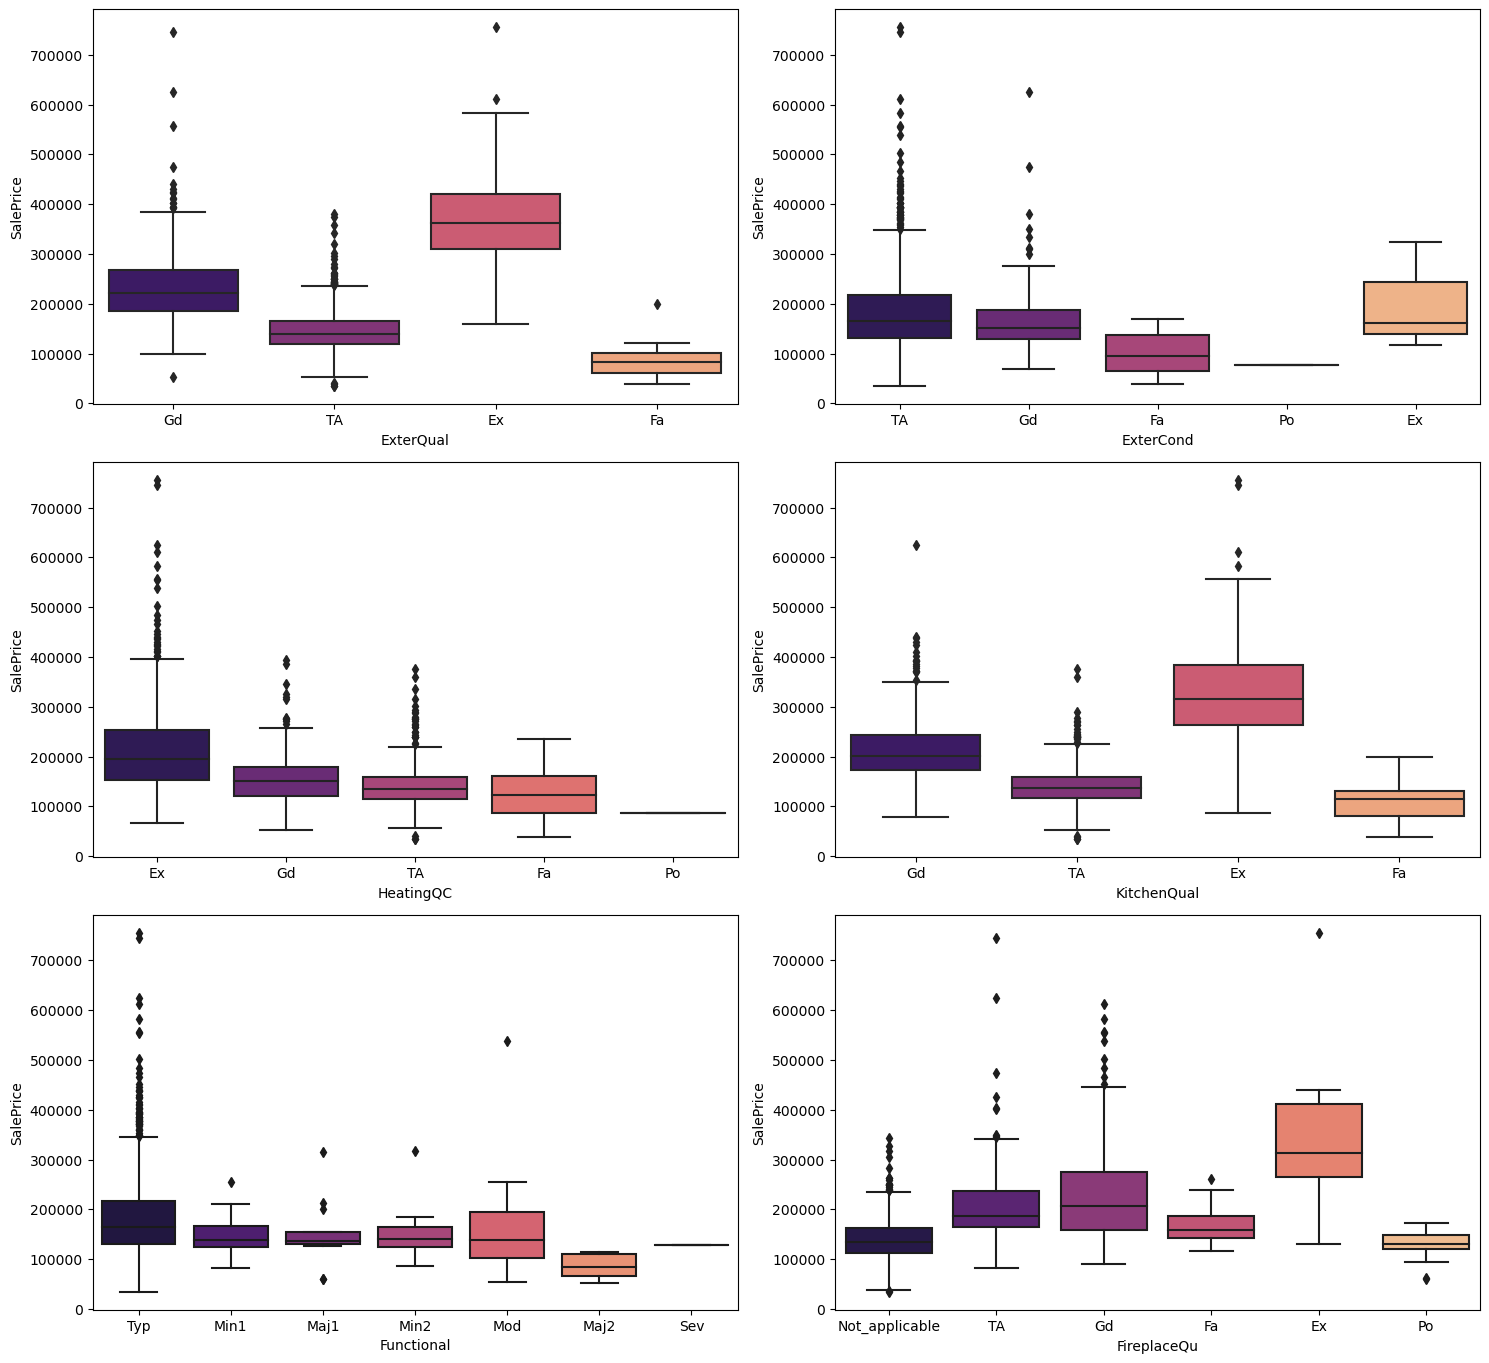

In [123]:
ext_features = ['ExterQual', 'ExterCond','HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(ext_features)

 - 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
 - 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice
 - Houses having excellent heating quality and kitchen quality have the highest SalePrice
 - Houses with typical functionality have highest SalePrice. There are very few houses that are severely damaged.
 - SalePrice range in largest for houses with average fireplace quality.

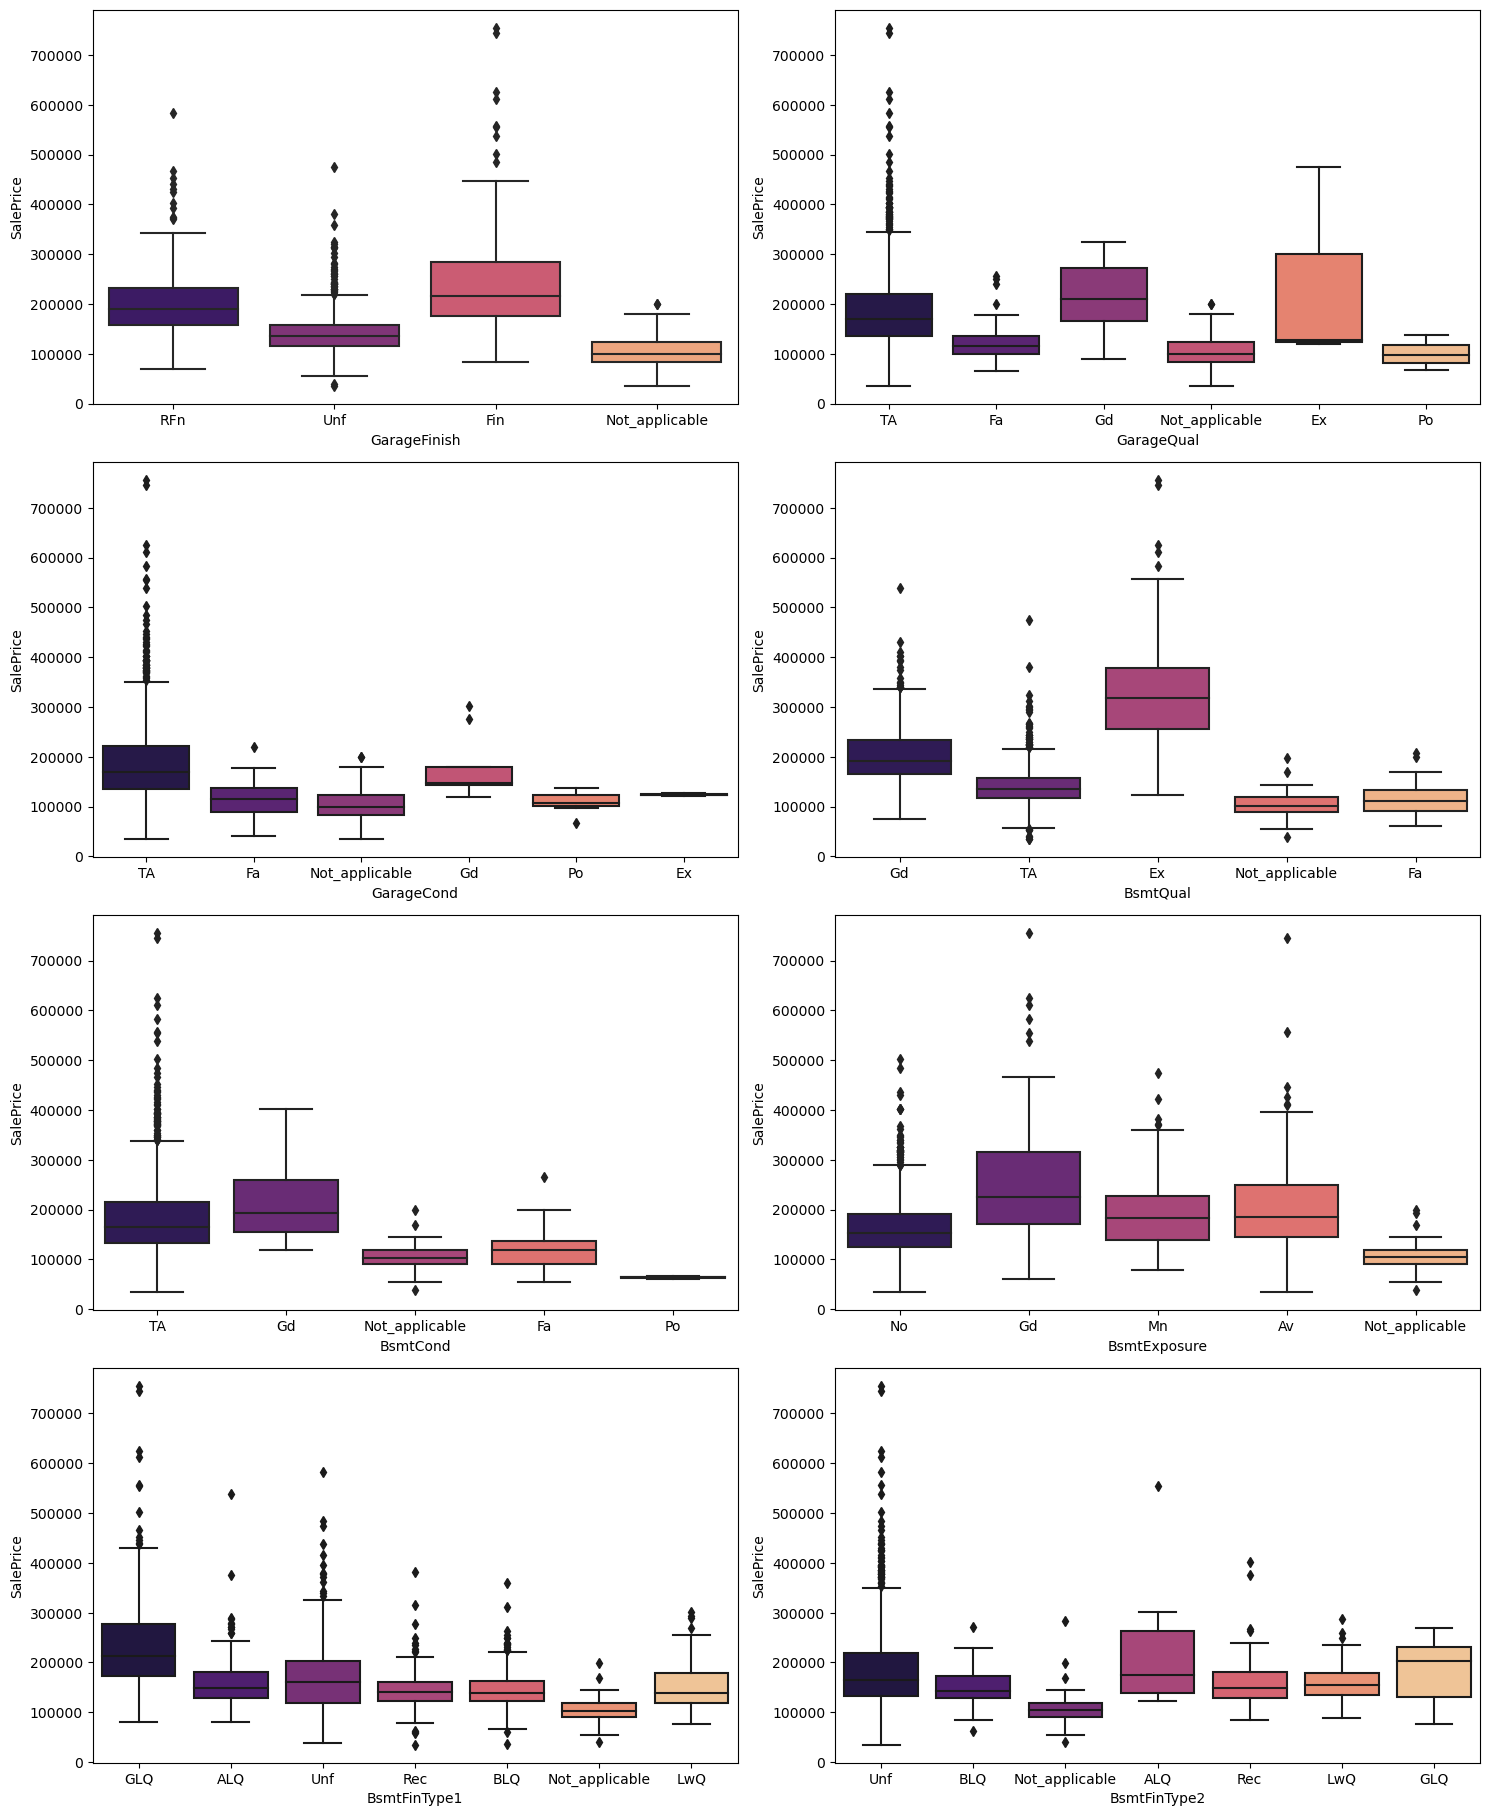

In [124]:
ext_features = ['GarageFinish', 'GarageQual','GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(ext_features)

 - SalePrice is highest where garage is finished.
 - The range of SalePrice is widest for Typical/Average Garage quality and condition.
 - There are very few houses with excellect condition of garage.
 - Houses with excellent quality basement have the highest SalePrice
 - Housing with good living quarters (BsmtFinType1= GLQ) have highest SalePrice
 - A lot of houses have unfinished basment or no basement (label = Not_applicable)

### Encoding Categorical Features

In [125]:
housing_df['LotShape'] = housing_df['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
housing_df['Utilities'] = housing_df['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
housing_df['LandSlope'] = housing_df['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
housing_df['HouseStyle'] = housing_df['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
housing_df['ExterQual'] = housing_df['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['ExterCond'] = housing_df['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['BsmtQual'] = housing_df['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtCond'] = housing_df['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
housing_df['HeatingQC'] = housing_df['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['CentralAir'] = housing_df['CentralAir'].map({'N':0,'Y':1})
housing_df['KitchenQual'] = housing_df['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
housing_df['GarageFinish'] = housing_df['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
housing_df['GarageQual'] = housing_df['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['GarageCond'] = housing_df['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
housing_df['Functional'] = housing_df['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
housing_df['FireplaceQu'] = housing_df['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

### Analyzing Unordered Featues

In [126]:
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood',
                      'Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                      'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType',
                      'PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']

In [127]:
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

**Inference:**

 - Most of the houses do not have alley
 - Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
 - Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

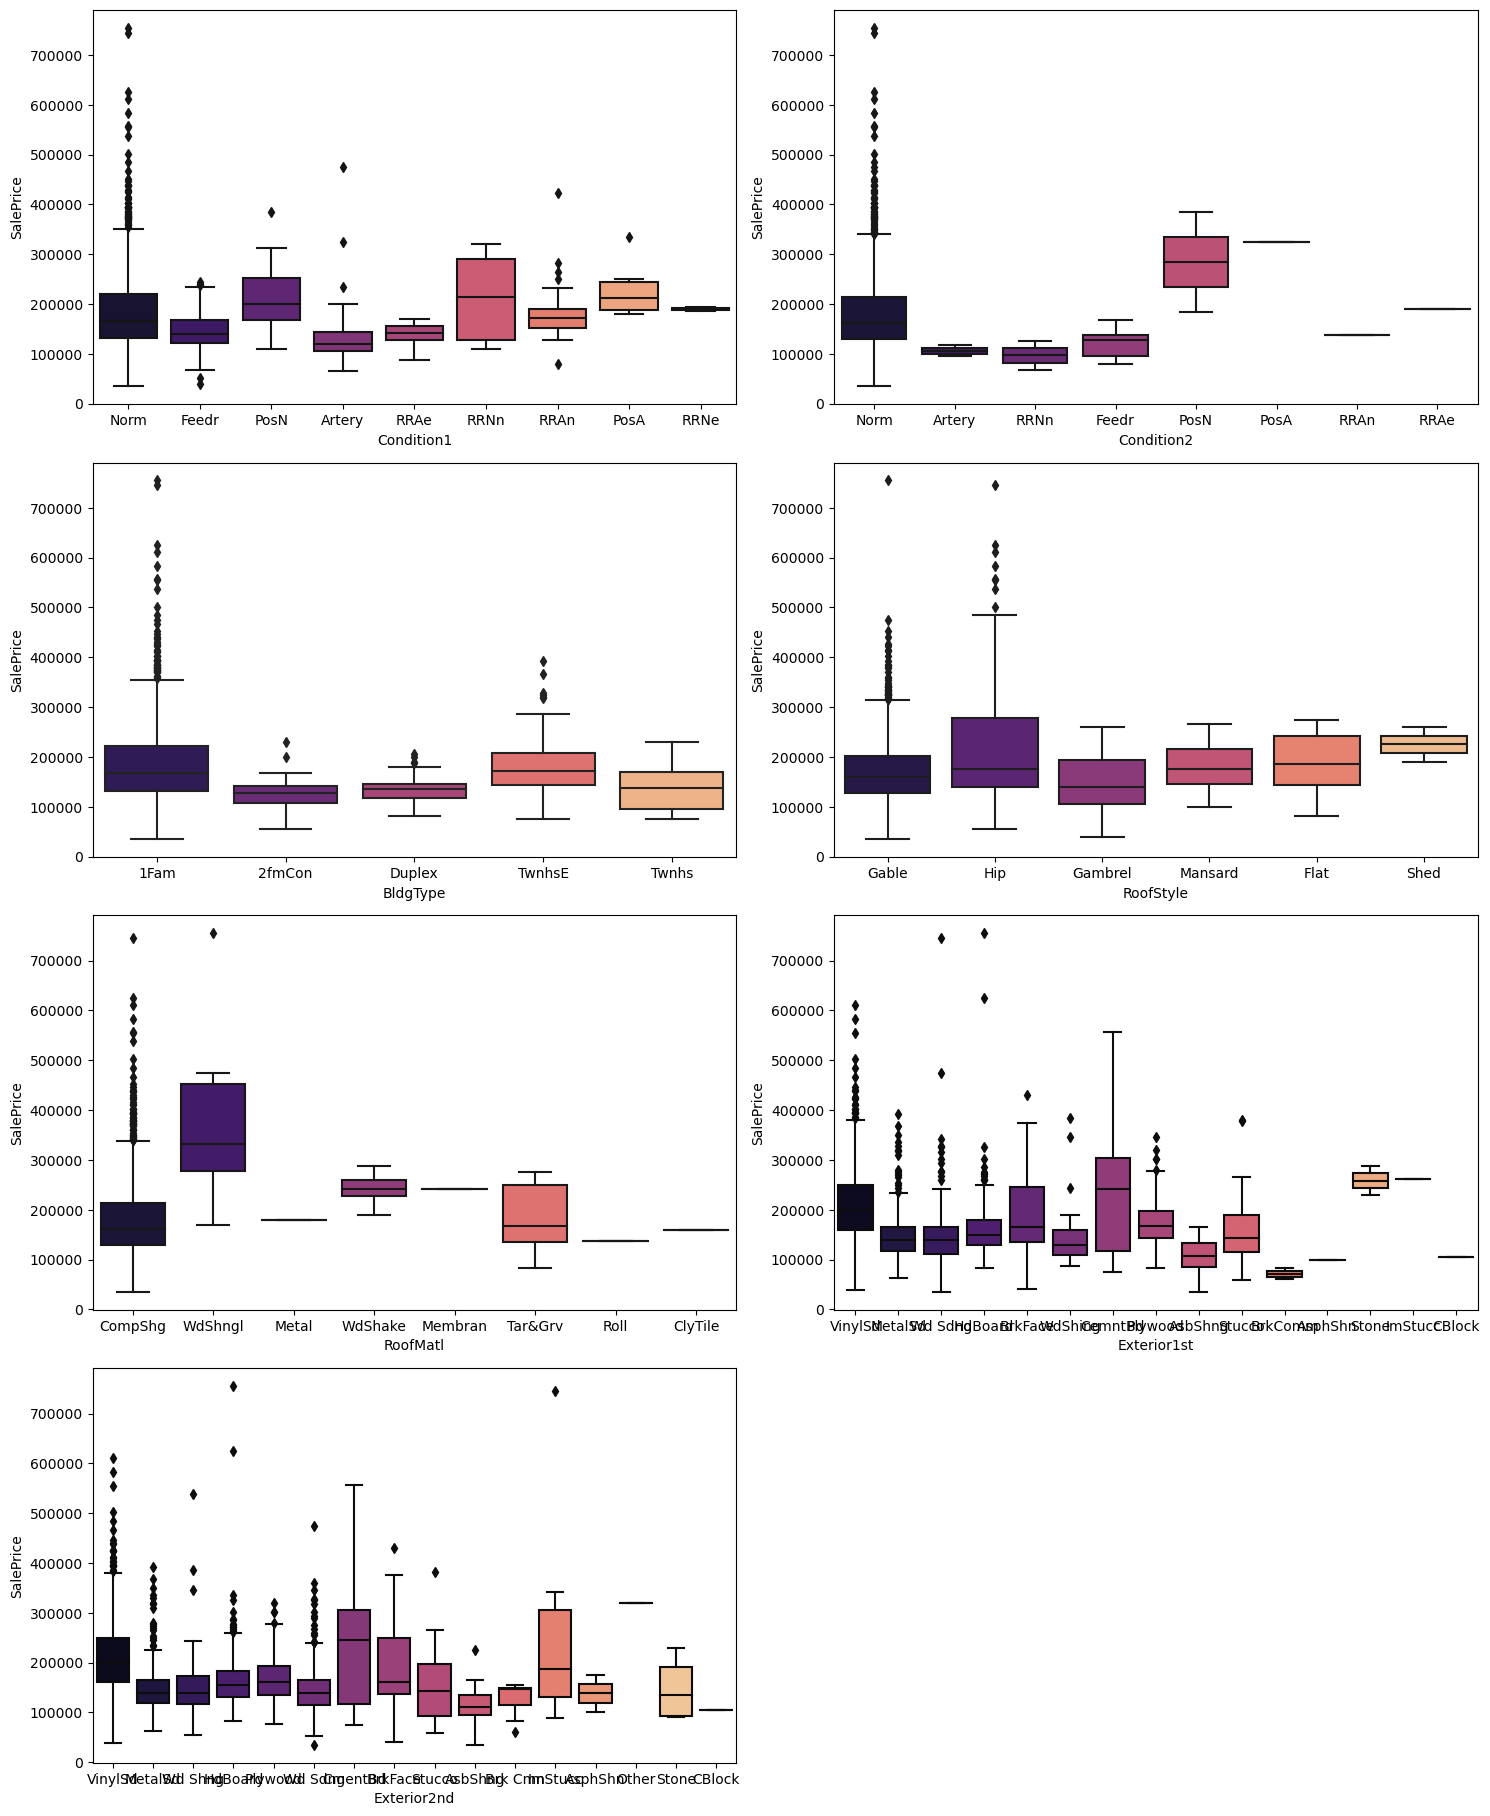

In [128]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

**Inference:**

 - Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
 - Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

In [129]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

**Inference:**

 - Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price

 - Houses with attached and built-in garage have high SalePrice

 - Most of the houses do not have fence (Fence= Not_applicable)

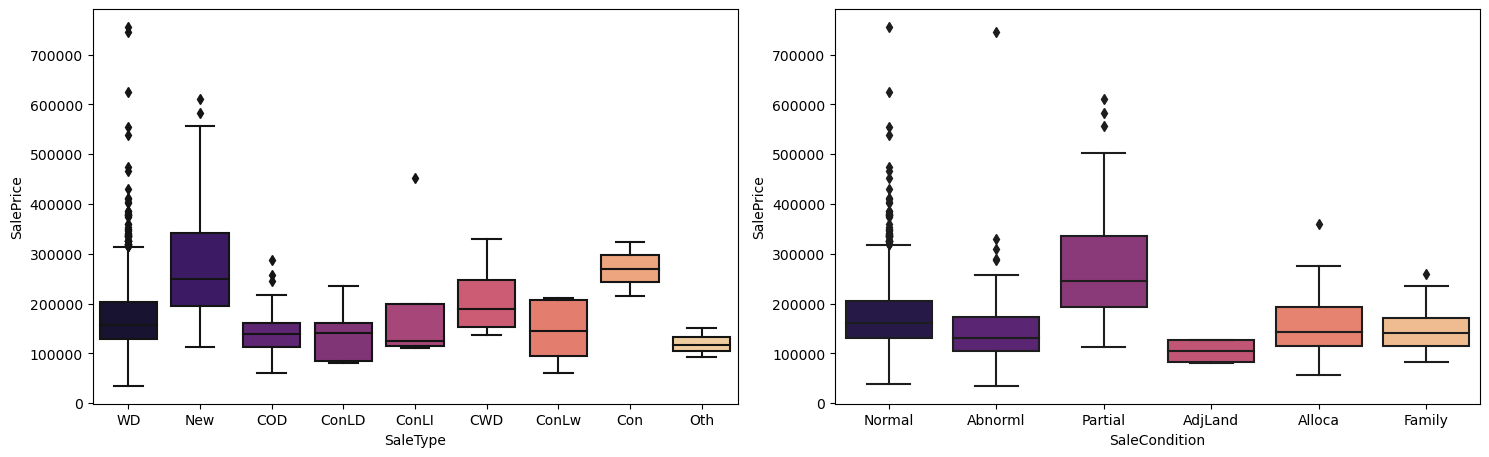

In [130]:
generate_boxplot(['SaleType','SaleCondition'])

**Inference:**

 - Most of the houses are newly built, houses with warranty deed have high SalePrice
 - Sale condition = Normal leads to high SalePrice

### Encoding Categorical Variables

In [131]:
dummy_df = pd.get_dummies(housing_df[unordered_features], drop_first=True)

In [132]:
dummy_df.shape

(1451, 144)

**Inference:**

Adding 144 features to the existing dataset will make the model very complex.
From the above boxplots, for some categorical features only label is dominating over others.
In dummy_df any label having same value in 80% or more rows will be dropped, as those new features are highly imbalanced.

In [133]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [134]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [135]:
housing_df.shape

(1451, 67)

In [136]:
# Adding the dummy variables to the original dataframe
housing_df = pd.concat([housing_df,dummy_df],axis=1)

# Dropping the redundant columns
housing_df = housing_df.drop(unordered_features,axis=1)

In [137]:
housing_df.shape

(1451, 96)

### Splitting into Train and Test Data

In [138]:
housing_df['SalePrice'].head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [139]:
X = housing_df.drop(['SalePrice'], axis=1)
X.head()

MSSubClass  LotFrontage  LotArea  LotShape  Utilities  LandSlope  \
0          60         65.0   8450.0         3          3          0   
1          20         80.0   9600.0         3          3          0   
2          60         68.0  11250.0         0          3          0   
3          70         60.0   9550.0         0          3          0   
4          60         84.0  14260.0         0          3          0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0           3            7          5.0       2003  ...                  0   
1           0            6          7.5       1976  ...                  0   
2           3            7          5.0       2001  ...                  0   
3           3            7          5.0       1915  ...                  1   
4           3            8          5.0       2000  ...                  0   

   GarageType_Not_applicable  PavedDrive_Y  Fence_MnPrv  Fence_Not_applicable  \
0                          0             1            0                     1   
1                          0             1            0                     1   
2                          0             1            0                     1   
3                          0             1            0                     1   
4                          0             1            0                     1   

   MiscFeature_Not_applicable  SaleType_New  SaleType_WD  \
0                           1             0            1   
1                           1             0            1   
2                           1             0            1   
3                           1             0            1   
4                           1             0            1   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 95 columns]

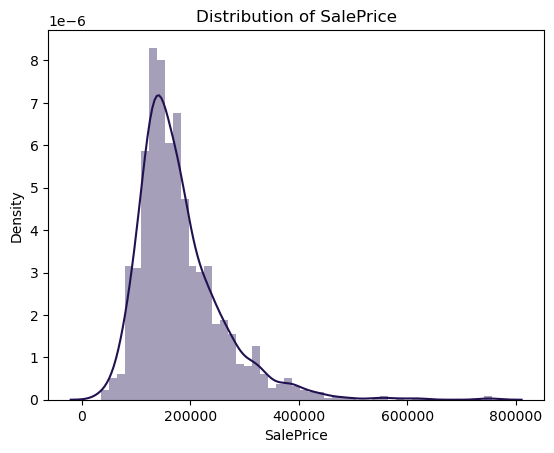

In [140]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(housing_df['SalePrice'])
plt.show()

**Inference:** 
 - Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.

In [141]:
sns.distplot(np.log(housing_df['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [142]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(housing_df['SalePrice'])
print(y.head())

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: SalePrice, dtype: float64


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [144]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 95)
(436, 95)
(1015,)
(436,)


In [145]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [146]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [147]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

### Feature Scaling

In [148]:
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

In [149]:
## Checking the features after 

X_train.head() # train data
X_test.head() # test data

MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0         0.8     0.196429  0.169374       1.0        1.0        0.0   
1         0.0     0.636905  0.601192       1.0        1.0        0.0   
2         0.0     0.494197  0.515594       0.0        1.0        0.0   
3         1.0     0.327381  0.259727       1.0        1.0        0.0   
4         0.0     0.601190  0.546782       0.0        1.0        0.0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0    0.000000        0.375        0.375      0.728  ...                0.0   
1    0.000000        0.750        0.375      0.968  ...                0.0   
2    0.000000        0.375        0.875      0.592  ...                1.0   
3    0.428571        0.375        0.625      0.216  ...                0.0   
4    0.000000        0.375        0.625      0.664  ...                0.0   

   GarageType_Not_applicable  PavedDrive_Y  Fence_MnPrv  Fence_Not_applicable  \
0                        0.0           1.0          1.0                   0.0   
1                        0.0           1.0          0.0                   1.0   
2                        0.0           1.0          0.0                   1.0   
3                        1.0           0.0          0.0                   1.0   
4                        0.0           1.0          1.0                   0.0   

   MiscFeature_Not_applicable  SaleType_New  SaleType_WD  \
0                         1.0           0.0          1.0   
1                         1.0           1.0          0.0   
2                         1.0           0.0          1.0   
3                         1.0           0.0          1.0   
4                         1.0           0.0          1.0   

   SaleCondition_Normal  SaleCondition_Partial  
0                   1.0                    0.0  
1                   0.0                    1.0  
2                   1.0                    0.0  
3                   1.0                    0.0  
4                   1.0                    0.0  

[5 rows x 95 columns]

In [150]:
X_train.describe()

MSSubClass  LotFrontage      LotArea     LotShape    Utilities  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000   
mean      0.283783     0.494197     0.499991     0.647619     0.999015   
std       0.298776     0.213278     0.220852     0.468687     0.031388   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.386905     0.371696     0.000000     1.000000   
50%       0.240000     0.494197     0.487926     1.000000     1.000000   
75%       0.400000     0.613095     0.619534     1.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         LandSlope   HouseStyle  OverallQual  OverallCond    YearBuilt  ...  \
count  1015.000000  1015.000000  1015.000000  1015.000000  1015.000000  ...   
mean      0.029557     0.237438     0.516502     0.513300     0.695819  ...   
std       0.135485     0.275204     0.171750     0.237953     0.238073  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       0.000000     0.000000     0.375000     0.375000     0.552000  ...   
50%       0.000000     0.142857     0.500000     0.375000     0.712000  ...   
75%       0.000000     0.428571     0.625000     0.625000     0.920000  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

       GarageType_Detchd  GarageType_Not_applicable  PavedDrive_Y  \
count        1015.000000                1015.000000   1015.000000   
mean            0.265025                   0.052217      0.923153   
std             0.441564                   0.222574      0.266480   
min             0.000000                   0.000000      0.000000   
25%             0.000000                   0.000000      1.000000   
50%             0.000000                   0.000000      1.000000   
75%             1.000000                   0.000000      1.000000   
max             1.000000                   1.000000      1.000000   

       Fence_MnPrv  Fence_Not_applicable  MiscFeature_Not_applicable  \
count  1015.000000           1015.000000                 1015.000000   
mean      0.109360              0.807882                    0.960591   
std       0.312244              0.394160                    0.194662   
min       0.000000              0.000000                    0.000000   
25%       0.000000              1.000000                    1.000000   
50%       0.000000              1.000000                    1.000000   
75%       0.000000              1.000000                    1.000000   
max       1.000000              1.000000                    1.000000   

       SaleType_New  SaleType_WD  SaleCondition_Normal  SaleCondition_Partial  
count   1015.000000  1015.000000           1015.000000            1015.000000  
mean       0.081773     0.867980              0.826601               0.083744  
std        0.274154     0.338679              0.378778               0.277140  
min        0.000000     0.000000              0.000000               0.000000  
25%        0.000000     1.000000              1.000000               0.000000  
50%        0.000000     1.000000              1.000000               0.000000  
75%        0.000000     1.000000              1.000000               0.000000  
max        1.000000     1.000000              1.000000               1.000000  

[8 rows x 95 columns]

### Initial Feature Selection with RFE

In [151]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_train, y_train)
    rfe = RFE(linear_m, n_features_to_select=n)
    rfe = rfe.fit(X_train, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_train.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [152]:
# Check for top 40 features
top_40 = top_n_features(40)

Top 40 features : 
['LotFrontage', 'LotArea', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'Functional', 'FireplaceQu', 'GarageArea', 'GarageQual', 'YrSold', 'Age', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofMatl_CompShg', 'Exterior1st_HdBoard', 'Foundation_CBlock', 'GarageType_Not_applicable', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']


In [153]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 40 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary())

In [154]:
build_regressor(X_train,y_train,top_40)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     247.6
Date:                Sun, 22 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:51:11   Log-Likelihood:                 701.63
No. Observations:                1015   AIC:                            -1323.
Df Residuals:                     975   BIC:                            -1126.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

**Inference:**

 - By inspecting adjusted R-square value of linear regression model of top 40 features seem to be optimum and have the good adjusted R-squared value on the training data.

In [155]:
X_train_rfe = X_train[top_40]
X_test_rfe = X_test[top_40]

In [156]:
#Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='ridge'):
    if model == 'ridge':
        estimator_model = Ridge()
    else:
        estimator_model = Lasso()
    
    model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
    model_cv.fit(X_train, y_train)
    
    
    alpha = model_cv.best_params_["alpha"]
    print("Optimum alpha for %s is %f" %(model, alpha))
    
    
    final_model = model_cv.best_estimator_
    print("Selected Type of model : ", final_model)
    final_model.fit(X_train, y_train)
    
    y_train_pred = final_model.predict(X_train)
    y_test_pred = final_model.predict(X_test)

    # Model Evaluation
    print(model.capitalize(),"Regression with alpha as",alpha)
    print("================= Model Evaluation ==================")
    print('R2 score (train) : ',r2_score(y_train,y_train_pred))
    print('R2 score (test) : ',r2_score(y_test,y_test_pred))
    
    print('RSS score (train) : ', np.sum(np.square(y_train - y_train_pred)))
    print('RSS score (test) : ', np.sum(np.square(y_test - y_test_pred)))
    
    print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
    print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

    return final_model, y_test_pred, y_train_pred

### Ridge Regression

In [157]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted, y_train_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 1.000000
Selected Type of model :  Ridge()
Ridge Regression with alpha as 1.0
================= Model Evaluation ==================
R2 score (train) :  0.9077147957760723
R2 score (test) :  0.8972481458772887
RSS score (train) :  15.008551972083305
RSS score (test) :  7.0611052523063265
RMSE (train) :  0.12160078417268584
RMSE (test) :  0.12726034548441503


**Inference:**
    
Ridge Regression model was able to achieve R2 score of 0.89 on test data i.e. 89% of the variance in test data can be explained by the model.

Root Mean Square Error = 0.1272 on test data, that means the prediction made by the model can off by 0.1272 unit.

### Residual Analysis of the train data for Ridge Model

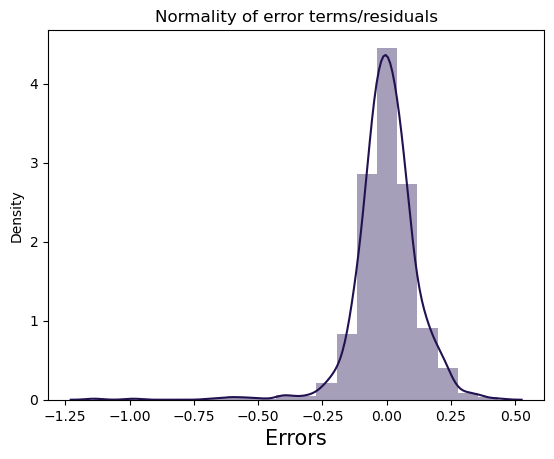

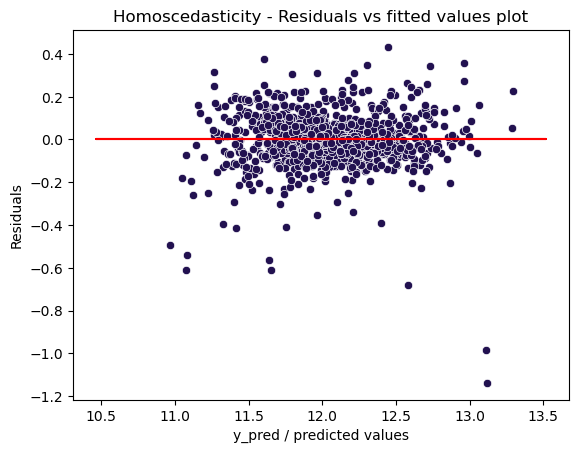

In [158]:
# Normality of Residuals
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
plt.title('Normality of error terms/residuals')               # Plot heading 
plt.xlabel('Errors', fontsize = 15) 
plt.show()

residuals = y_train - y_train_predicted

sns.scatterplot(x=y_train_predicted,y=residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_pred / predicted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity - Residuals vs fitted values plot')
plt.show()

**Inference**

 - We can see error terms are normally distributed
 - The residuals are spread uniformly, which holds the assumption of homoscedasticity. Also no visible pattern were observed from above plot for residuals.

### Lasso Regression

In [159]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted, y_train_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
Selected Type of model :  Lasso(alpha=0.001)
Lasso Regression with alpha as 0.001
================= Model Evaluation ==================
R2 score (train) :  0.9025492239897592
R2 score (test) :  0.9008177288916472
RSS score (train) :  15.848640621963614
RSS score (test) :  6.815803582702106
RMSE (train) :  0.12495768987178113
RMSE (test) :  0.12503030442475183


### Residual Analysis of the train data for Lasso Model

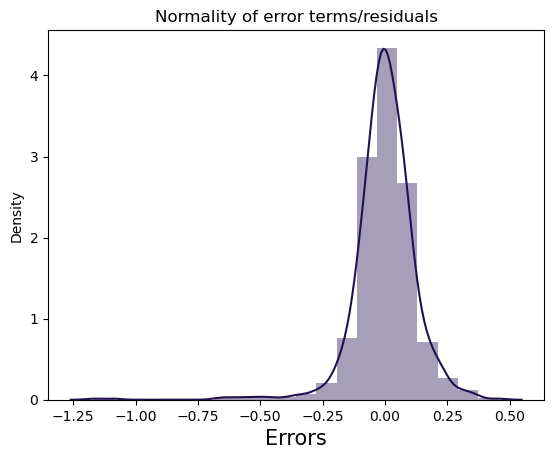

In [160]:
# Normality of Residuals
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
plt.title('Normality of error terms/residuals')               # Plot heading 
plt.xlabel('Errors', fontsize = 15) 
plt.show()

residuals = y_train - y_train_predicted

sns.scatterplot(x=y_train_predicted,y=residuals)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('y_pred / predicted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity - Residuals vs fitted values plot')
plt.show()

**Inference**

 - We can see error terms are normally distributed
 - The residuals are spread uniformly, which holds the assumption of homoscedasticity. Also no visible pattern were observed from above plot for residuals.

### Comparing Model Coefficients

In [161]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=1.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

Ridge (alpha=1.0)  Lasso (alpha=0.001)
LotFrontage                         0.037567             0.014813
LotArea                             0.141771             0.136008
Utilities                           0.048875             0.000000
LandSlope                           0.054892             0.000000
OverallQual                         0.502275             0.556783
OverallCond                         0.202176             0.173246
YearBuilt                           0.085624             0.000000
YearRemodAdd                       -0.058004            -0.078471
BsmtExposure                        0.050194             0.047109
BsmtFinType1                        0.036528             0.041657
BsmtFinSF1                          0.199546             0.130562
BsmtFinType2                        0.070593             0.003961
BsmtUnfSF                           0.102246             0.020131
CentralAir                          0.092037             0.086370
1stFlrSF                            0.542601             0.594841
2ndFlrSF                            0.434904             0.442833
BsmtFullBath                        0.088578             0.054862
FullBath                            0.064889             0.012088
HalfBath                            0.065147             0.038874
Functional                         -0.195724            -0.141397
FireplaceQu                         0.061879             0.065406
GarageArea                          0.087991             0.111116
GarageQual                          0.158314             0.022310
YrSold                             -0.012066            -0.000000
Age                                -0.086010            -0.182486
MSZoning_RL                         0.070537             0.073678
Street_Pave                         0.086577             0.000000
LotConfig_CulDSac                   0.053650             0.033191
Neighborhood_Edwards               -0.064891            -0.061559
Neighborhood_NridgHt                0.079093             0.058310
Neighborhood_Somerst                0.108688             0.088303
Condition1_Norm                     0.065474             0.065513
Condition2_Norm                     0.201732             0.058925
RoofMatl_CompShg                    0.043533             0.000000
Exterior1st_HdBoard                -0.032877            -0.020194
Foundation_CBlock                  -0.053554            -0.043589
GarageType_Not_applicable           0.020794            -0.035664
SaleType_New                        0.153303             0.090405
SaleCondition_Normal                0.081015             0.066449
SaleCondition_Partial              -0.045522             0.000000

In [162]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[135048 233054 164542 122066 180439]


### Final Model

Lasso Regression produced slightly better R2 score on test data than Ridge Regression. Choosing Lasso as the final model.


In [163]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False)

Lasso (alpha=0.001)
1stFlrSF                              0.594841
OverallQual                           0.556783
2ndFlrSF                              0.442833
OverallCond                           0.173246
LotArea                               0.136008
BsmtFinSF1                            0.130562
GarageArea                            0.111116
SaleType_New                          0.090405
Neighborhood_Somerst                  0.088303
CentralAir                            0.086370
MSZoning_RL                           0.073678
SaleCondition_Normal                  0.066449
Condition1_Norm                       0.065513
FireplaceQu                           0.065406
Condition2_Norm                       0.058925
Neighborhood_NridgHt                  0.058310
BsmtFullBath                          0.054862
BsmtExposure                          0.047109
BsmtFinType1                          0.041657
HalfBath                              0.038874
LotConfig_CulDSac                     0.033191
GarageQual                            0.022310
BsmtUnfSF                             0.020131
LotFrontage                           0.014813
FullBath                              0.012088
BsmtFinType2                          0.003961
YrSold                               -0.000000
Street_Pave                           0.000000
YearBuilt                             0.000000
RoofMatl_CompShg                      0.000000
LandSlope                             0.000000
Utilities                             0.000000
SaleCondition_Partial                 0.000000
Exterior1st_HdBoard                  -0.020194
GarageType_Not_applicable            -0.035664
Foundation_CBlock                    -0.043589
Neighborhood_Edwards                 -0.061559
YearRemodAdd                         -0.078471
Functional                           -0.141397
Age                                  -0.182486

In [164]:
model_coefficients[['Lasso (alpha=0.001)']].sort_values(by='Lasso (alpha=0.001)', ascending=False).index[:10]


Index(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'LotArea',
       'BsmtFinSF1', 'GarageArea', 'SaleType_New', 'Neighborhood_Somerst',
       'CentralAir'],
      dtype='object')

**Intrepretting the Model**

 - Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method.
 - Optimum alpha = `1.0` for Ridge and `0.001` for Lasso model.

 - Model evaluation is done with R2 score and Root Mean Square Error.
 
 - Ridge Regression Model's R2 score (test) is `0.8972` and RMSE (test) is `0.1272`.
 
 - Lasso Regression Model's R2 score (test) is `0.9008` and RMSE (test) is `0.1250`.

 - Lasso Regression is chosen as final model for having slightly better R-square value on test data.

 - Out of 40 features in the final model, top 10 features in order of descending importance are `1stFlrSF`, `OverallQual`, `2ndFlrSF`, `OverallCond`, `LotArea`,`BsmtFinSF1`, `GarageArea`, `BsmtQual`, `Neighborhood_Somerst`, `SaleType_New`

 - Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by `0.594841` with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable. Zero means that variables are removed from the model, hence the sparsity.

We are able to achieve an R2 score of 0.90 approx on both Ridge and Lasso Models. The following factors influence the house price the most as demosntrated by both the models:-

 - Total area in square foot
 - Overall material and finish of the house
 - Overall Condition
 - Lot size in square feet
 - Total Garage Area
 - Height of the basement
 - Physical locations within Ames city limits especially Somerset
 - Homes that just constructed and sold

### Subjective Questions Code

Question 1

What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

Ans: The Optimal value of alpha for Ridge is 1.0 and for Lasso it is 0.001. Hence doubling it would result it in 2 and 0.002

In [166]:
# Building Ridge Model by doubling the value of alpha to 2.0

# Model Building
ridge_double = Ridge(alpha=2.0)
ridge_double.fit(X_train_rfe,y_train)
ridge_double_coef = ridge_double.coef_

y_train_pred = ridge_double.predict(X_train_rfe)
y_test_pred = ridge_double.predict(X_test_rfe)

print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))


print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

ridge_double_coeff = pd.DataFrame(np.atleast_2d(ridge_double_coef),columns=X_train_rfe.columns)
ridge_double_coeff = ridge_double_coeff.T
ridge_double_coeff.rename(columns={0: 'Ridge (alpha=2.0)'},inplace=True)
ridge_double_coeff.sort_values(by=['Ridge (alpha=2.0)'], ascending=False,inplace=True)

print('The most important predictors are')
ridge_double_coeff.head(20)

R2 score (train) :  0.9067
R2 score (test) :  0.8991
RMSE (train) :  0.1223
RMSE (test) :  0.1261
The most important predictors are


Ridge (alpha=2.0)
1stFlrSF                       0.509400
OverallQual                    0.478703
2ndFlrSF                       0.408197
BsmtFinSF1                     0.202770
OverallCond                    0.198382
Condition2_Norm                0.173957
LotArea                        0.141485
GarageQual                     0.127308
SaleType_New                   0.117817
BsmtUnfSF                      0.107042
Neighborhood_Somerst           0.103915
GarageArea                     0.098622
CentralAir                     0.092084
FullBath                       0.087859
BsmtFullBath                   0.086846
YearBuilt                      0.082525
Neighborhood_NridgHt           0.079859
SaleCondition_Normal           0.078588
Street_Pave                    0.076772
HalfBath                       0.075156

In [167]:
# Building Lasso Model by doubling the value of alpha to 0.002

# Model Building
lasso_double = Lasso(alpha= 0.002)
lasso_double.fit(X_train_rfe,y_train)
lasso_double_coef = lasso_double.coef_

y_train_pred = lasso_double.predict(X_train_rfe)
y_test_pred = lasso_double.predict(X_test_rfe)

print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))


print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

lasso_double_coef = pd.DataFrame(np.atleast_2d(lasso_double_coef),columns=X_train_rfe.columns)
lasso_double_coef = lasso_double_coef.T
lasso_double_coef.rename(columns={0: 'Lasso (alpha=0.002)'},inplace=True)
lasso_double_coef.sort_values(by=['Lasso (alpha=0.002)'], ascending=False,inplace=True)

print('The most important predictors are')
ridge_double_coeff.head(20)

R2 score (train) :  0.8944
R2 score (test) :  0.8967
RMSE (train) :  0.13
RMSE (test) :  0.1276
The most important predictors are


Ridge (alpha=2.0)
1stFlrSF                       0.509400
OverallQual                    0.478703
2ndFlrSF                       0.408197
BsmtFinSF1                     0.202770
OverallCond                    0.198382
Condition2_Norm                0.173957
LotArea                        0.141485
GarageQual                     0.127308
SaleType_New                   0.117817
BsmtUnfSF                      0.107042
Neighborhood_Somerst           0.103915
GarageArea                     0.098622
CentralAir                     0.092084
FullBath                       0.087859
BsmtFullBath                   0.086846
YearBuilt                      0.082525
Neighborhood_NridgHt           0.079859
SaleCondition_Normal           0.078588
Street_Pave                    0.076772
HalfBath                       0.075156

Doubling alpha value slightly reduced the Lasso's test R2 score from `0.9008` to `0.8944` does not do any significant change in both the models and RMSE remains almost the same. The most important predictor variables is now `OverallQual` instead of `1stFlrSF` in the Lasso Model. All the negative and 0 coefficients are not considered as well

3. After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [168]:
#Removing the 5 most important predictor variables from the incoming dataset
X_test_rfe1 = X_test_rfe.drop(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'LotArea'],axis=1)
X_train_rfe1 = X_train_rfe.drop(['1stFlrSF', 'OverallQual', '2ndFlrSF', 'OverallCond', 'LotArea'],axis=1)

# Building Lasso Model with the new dataset
new_lasso = Lasso(alpha=0.001)
new_lasso.fit(X_train_rfe1,y_train)
new_lasso_coef = new_lasso.coef_

y_train_pred = new_lasso.predict(X_train_rfe1)
y_test_pred = new_lasso.predict(X_test_rfe1)

print('R2 score (train) : ',round(r2_score(y_train,y_train_pred), 4))
print('R2 score (test) : ',round(r2_score(y_test,y_test_pred), 4))

print('RMSE (train) : ', round(np.sqrt(mean_squared_error(y_train, y_train_pred)), 4))
print('RMSE (test) : ', round(np.sqrt(mean_squared_error(y_test, y_test_pred)), 4))

new_lasso_coef = pd.DataFrame(np.atleast_2d(new_lasso_coef),columns=X_train_rfe1.columns)
new_lasso_coef = new_lasso_coef.T

new_lasso_coef.rename(columns={0: 'New Lasso Co-Efficient'},inplace=True)
new_lasso_coef.sort_values(by=['New Lasso Co-Efficient'], ascending=False,inplace=True)

print('The most important predictor variables are')
new_lasso_coef.head(5)

R2 score (train) :  0.825
R2 score (test) :  0.8345
RMSE (train) :  0.1675
RMSE (test) :  0.1615
The most important predictor variables are


New Lasso Co-Efficient
FullBath                  0.467214
BsmtFinSF1                0.462828
BsmtUnfSF                 0.290161
GarageArea                0.274288
HalfBath                  0.256788